# Analyzing Gun Deaths in the US: 2012-2014


### Data Schema
- **year**: the year in which the fatality occurred.
- **month**: the month in which the fatality occurred.
- **intent**: the intent of the perpetrator of the crime. This can be Suicide, Accidental, NA, Homicide, or Undetermined.
- **police**: whether a police officer was involved with the shooting. Either 0 (false) or 1 (true).
- **sex**: the gender of the victim. Either M or F.
- **age**: the age of the victim.
- **race**: the race of the victim. Either Asian/Pacific Islander, Native American/Native Alaskan, Black, Hispanic, or White.
- **hispanic**: a code indicating the Hispanic origin of the victim.
- **place**: where the shooting occurred. Has several categories, which you're encouraged to explore on your own.
- **education**: educational status of the victim. Can be one of the following:
    * 1: Less than High School
    * 2: Graduated from High School or equivalent
    * 3: Some College
    * 4: At least graduated from College
    * 5: Not available

### First, let's import libraries and load the dataset.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('../../../Data/guns.csv')

# 1. Basic information

First, always look at basic information about the dataset. 

<br>
Display the dimensions of the dataset.

In [4]:
df.shape

(100798, 10)

In [11]:
df.dtypes[df.dtypes == 'object']

intent    object
sex       object
race      object
place     object
dtype: object

In [12]:
# Organizing the data by a column value: first by the year, then by month:
df.sort_values(['year', 'month'], inplace=True)
df.head(10)

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
11,2012,1,Suicide,0,M,21.0,Native American/Native Alaskan,100,Home,2.0
134,2012,1,suicide,0,F,59.0,White,100,Home,2.0
135,2012,1,suicide,0,F,30.0,White,100,Other unspecified,4.0
136,2012,1,Homicide,0,M,58.0,Black,100,Home,1.0
137,2012,1,suicide,0,M,78.0,White,100,Home,4.0
138,2012,1,suicide,0,M,60.0,White,100,Other unspecified,1.0
139,2012,1,accident,0,M,61.0,White,100,Home,2.0


# 2. Distributions of numeric features

One of the most enlightening data exploration tasks is plotting the distributions of your features.

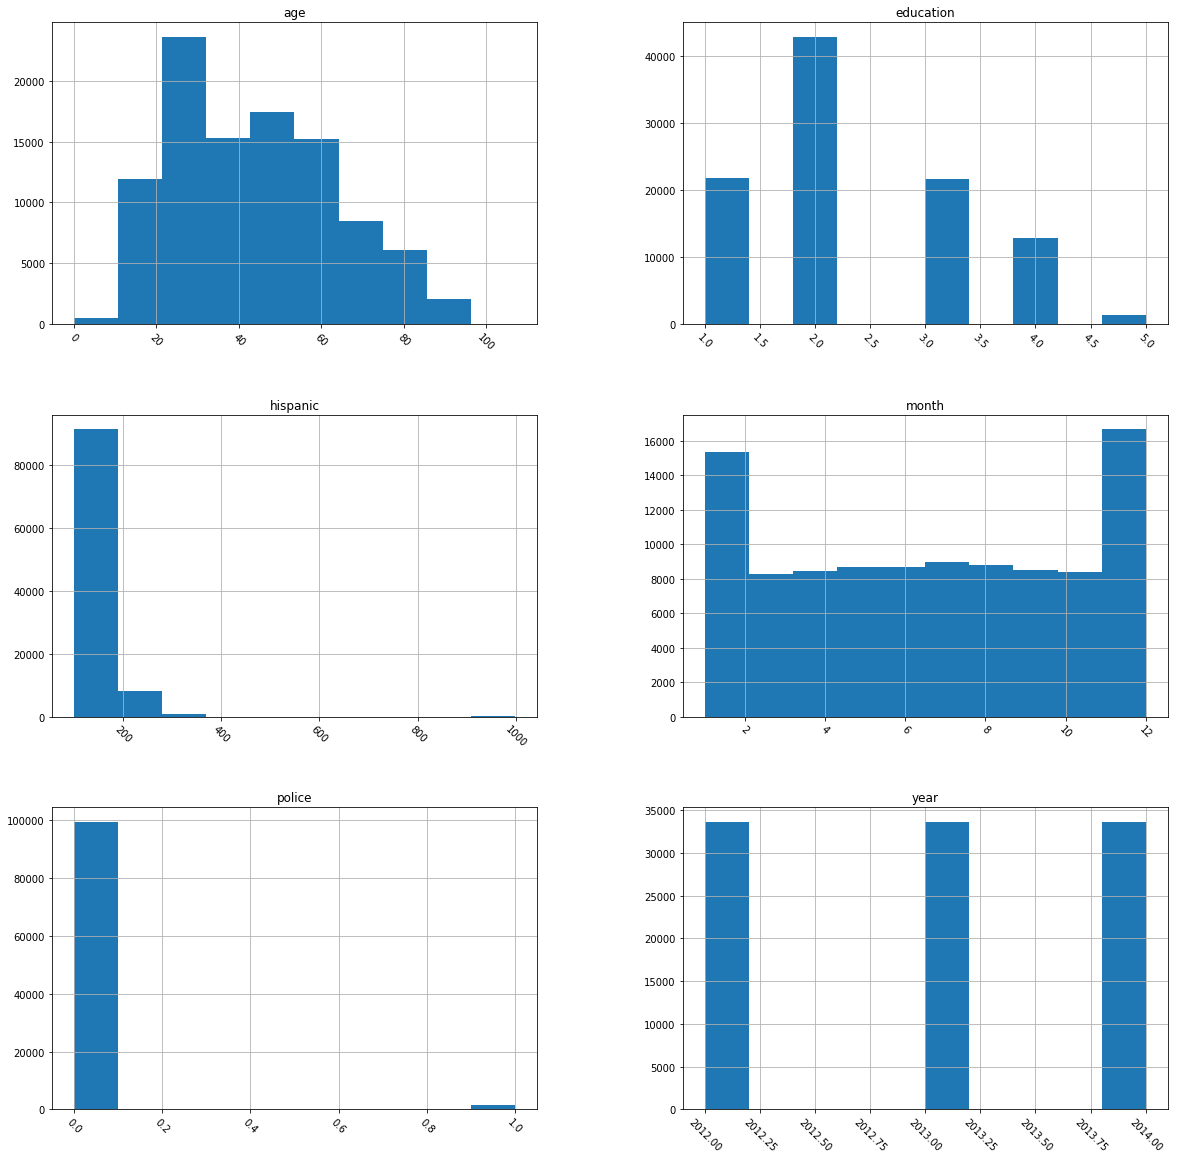

In [13]:
# Plot histogram grid
df.hist(xrot=-45, figsize=(20, 20))
# Clear the text "residue"
plt.show()

In [17]:
# Summarize numerical features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,100798.0,2013.000357,0.816278,2012.0,2012.0,2013.0,2014.0,2014.0
month,100798.0,6.567601,3.405609,1.0,4.0,7.0,9.0,12.0
police,100798.0,0.013909,0.117114,0.0,0.0,0.0,0.0,1.0
age,100780.0,43.857601,19.496181,0.0,27.0,42.0,58.0,107.0
hispanic,100798.0,114.179607,61.595734,100.0,100.0,100.0,100.0,998.0
education,100745.0,2.296352,0.990105,1.0,2.0,2.0,3.0,5.0


# 3. Distributions of categorical features

Next, let's take a look at the distributions of our categorical features.
<br>

Display summary statistics for categorical features.

In [19]:
# Summarize categorical features
df.describe(include=["object"])

,intent,sex,race,place
count,100797,100798,100798,99414
unique,7,2,6,10
top,Suicide,M,White,Home
freq,62138,86349,65585,60486


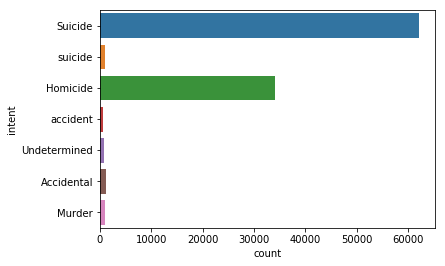

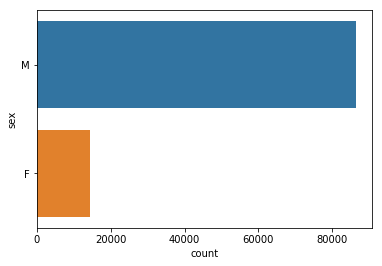

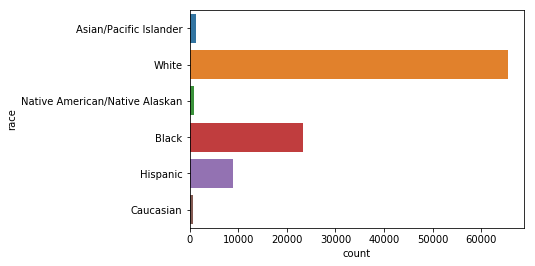

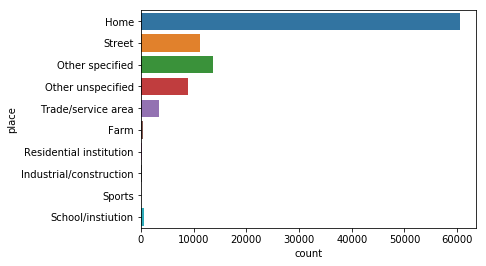

In [20]:
# Plot bar plot for each categorical feature
for feature in df.select_dtypes(include=['object']): 
    sns.countplot(y=feature, data=df)
    plt.show()

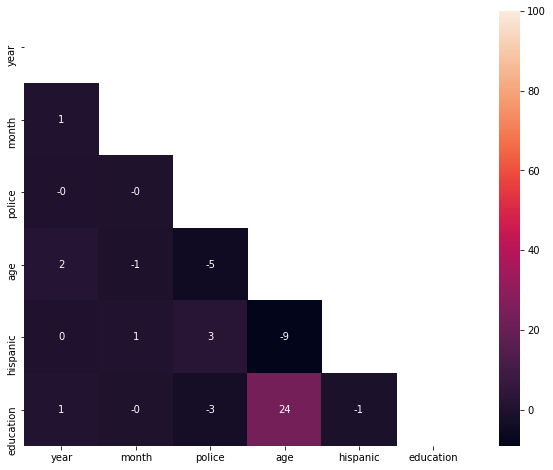

In [21]:
# Calculate correlations between numeric features
correlations = df.corr()

# Make the figsize 10 x 8
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap of annotated correlations
correlations = correlations * 100

# Plot heatmap of correlations
sns.heatmap(correlations, annot=True, fmt='.0f', mask=mask)

# 4. Data Cleaning
Drop unwanted observations

In [22]:
# Drop duplicates
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(100798, 10)
(63669, 10)


In [ ]:
63655

### Fix structural errors

The next bucket under data cleaning involves fixing structural errors. 

<br>

In [23]:
# Display unique values of 'police'
df.police.unique()

array([0, 1], dtype=int64)

Next, to check for typos, mislabeled classes or inconsistent capitalization, display all the class distributions for the <code style="color:steelblue">'intent'</code> feature.

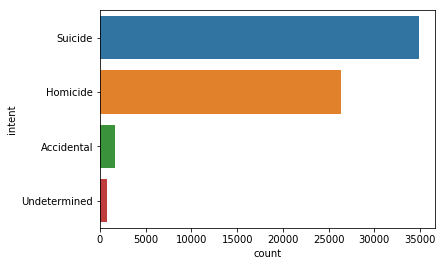

In [27]:
# Class distributions for 'intent'
sns.countplot(y='intent', data=df)

In [26]:
# Murder should be Homicide
df['intent'].replace('Murder', 'Homicide', inplace=True)
# accident should be Accidental
df['intent'].replace('accident', 'Accidental', inplace=True)
# suicide should be Suicide
df['intent'].replace('suicide', 'Suicide', inplace=True)

### Plot the class distributions for 'intent' for comparison

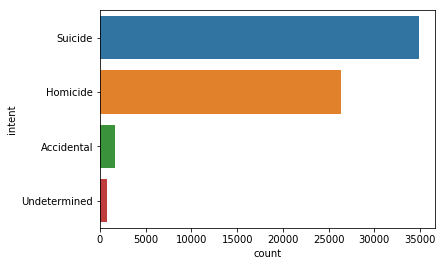

In [28]:
# Class distributions for 'intent'
sns.countplot(y='intent', data=df)

Looks much better!!

Now do the same for 'race'

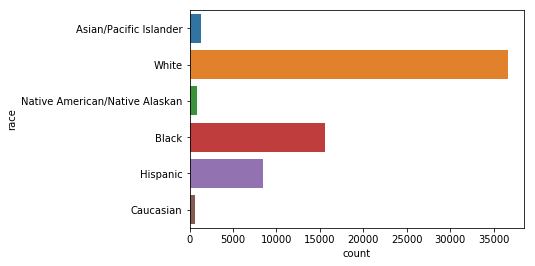

In [29]:
# Class distributions for 'race'
sns.countplot(y='race', data=df)

In [30]:
# Caucasian should be White
df['race'].replace('Caucasian', 'White', inplace=True)

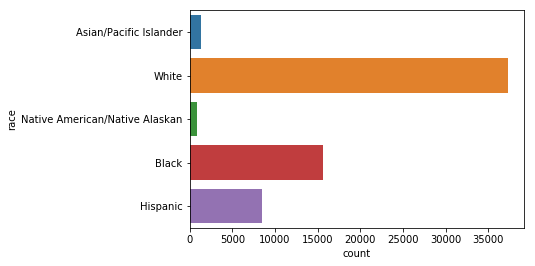

In [31]:
# Class distributions for 'Race'
sns.countplot(y='race', data=df)


### Label missing categorical data

It's finally time to address missing data.

<br>
First, find and count the missing categorical data.

In [36]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

intent       1
sex          0
race         0
place     1314
dtype: int64

In [42]:
df['place'].fillna('Missing')

0

In [43]:
# Fill missing categorical values
for column in df.select_dtypes(include=['object']):
    df[column].fillna('Missing', inplace=True)

In [44]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

intent    0
sex       0
race      0
place     0
dtype: int64

# Flag and fill missing numeric data

Finally, let's flag and fill missing numeric data.

<br>
First, let's find and count missing values in numerical feature.

In [45]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

year          0
month         0
police        0
age          14
hispanic      0
education    52
dtype: int64

Let's take a look at the unique values for education to see if we should replace null values or drop the observations. Reference the schema above for education definitions.

In [46]:
# View unique values for education
df.education.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

In [48]:
# Fill missing categorical values
df['education'] = df['education'].fillna(5)

In [49]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

year          0
month         0
police        0
age          14
hispanic      0
education     0
dtype: int64

Great, looks like you've taken care of education. Now handle the age missing values...

In [50]:
# drop missing categorical values
df = df.dropna(axis="rows", subset=['age'])

In [51]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

year         0
month        0
police       0
age          0
hispanic     0
education    0
dtype: int64

In [52]:
df.shape

(63655, 10)

### For readability and concistency - capitalizing column names and name the index

In [53]:
df.index.name = 'Index'
df.columns = map(str.capitalize, df.columns)
df.head()

,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
11,2012,1,Suicide,0,M,21.0,Native American/Native Alaskan,100,Home,2.0
134,2012,1,Suicide,0,F,59.0,White,100,Home,2.0


In [55]:
# Save our cleaned data for later use
df.to_csv('./cleaned_guns.csv', index=None)

In [57]:
test = pd.read_csv('./cleaned_guns.csv')

In [59]:
test.shape

(63655, 10)